In [39]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))
base="../input"
train_in="../input/train/train"
file_names=(os.listdir("../input/train/train"))
# Any results you write to the current directory are saved as output.

['train', 'sampleSubmission.csv', 'test1']


In [40]:
#print(file_names)
targets=list()
full_paths=list()
for x in file_names:
    temp=os.path.join(train_in,x)
    full_paths.append(temp)
    #temp2=file_names.split(".")[0] #NOTERROR: TAKE A SINGLE ITEM INSTEAD OF ENTIRE LIST
    temp2=x.split(".")[0]
    targets.append(temp2)


In [41]:
print(targets[:10])

['cat', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'cat', 'cat', 'cat']


In [42]:
#targets2=list(len(targets))
#for y in range(len(targets)):
#    if targets[y] == 'dog':
#        targets[y]=1
##    else:
 #       targets[y]=0

In [43]:
print(full_paths[:10])
print(targets[:10])

['../input/train/train/cat.11679.jpg', '../input/train/train/dog.2811.jpg', '../input/train/train/dog.2578.jpg', '../input/train/train/dog.9238.jpg', '../input/train/train/dog.7504.jpg', '../input/train/train/dog.11302.jpg', '../input/train/train/dog.11743.jpg', '../input/train/train/cat.8233.jpg', '../input/train/train/cat.1653.jpg', '../input/train/train/cat.12144.jpg']
['cat', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'cat', 'cat', 'cat']


In [44]:
dataset=pd.DataFrame()
dataset['Paths']=full_paths
dataset['Name']=targets

In [45]:
dataset.head()

,Paths,Name
0,../input/train/train/cat.11679.jpg,cat
1,../input/train/train/dog.2811.jpg,dog
2,../input/train/train/dog.2578.jpg,dog
3,../input/train/train/dog.9238.jpg,dog
4,../input/train/train/dog.7504.jpg,dog


In [46]:
#import matplotlib.pyplot as plt
#plt.imshow(dataset.iloc(0))

In [47]:
#from sklearn import train_test_split
import sklearn
from sklearn.model_selection import train_test_split
train_1230,test_123=sklearn.model_selection.train_test_split(dataset,test_size=0.2,random_state=42)

In [48]:
import tensorflow as tf

In [49]:
model=tf.keras.Sequential([tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(150,150,3)),
                          tf.keras.layers.MaxPooling2D(2,2),
                          tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
                          tf.keras.layers.MaxPooling2D(2,2),
                          tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
                          tf.keras.layers.MaxPooling2D(2,2),
                          tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
                          tf.keras.layers.MaxPooling2D(2,2),
                          tf.keras.layers.Flatten(),
                          tf.keras.layers.Dense(512,activation='relu'),
                          tf.keras.layers.Dense(1,activation='sigmoid')])

In [50]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 128)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       147584    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 64)        73792     
__________

In [51]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001),
              loss="binary_crossentropy",metrics=['acc'])
print("[INFO]: model compiled...")

[INFO]: model compiled...


In [52]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)

In [53]:
train_data_generator=train_datagen.flow_from_dataframe(dataframe=train_1230,
                                                      x_col='Paths',
                                                      y_col='Name',target_size=(150,150),
                                                      class_mode="binary",
                                                      batch_size=150)

Found 20000 images belonging to 2 classes.


In [54]:
print(train_data_generator)

In [55]:
test_data_generator=test_datagen.flow_from_dataframe(dataframe=test_123,
                                                      x_col='Paths',
                                                      y_col='Name',
                                                      target_size=(150,150),
                                                      class_mode="binary",
                                                      batch_size=150)

Found 5000 images belonging to 2 classes.


In [56]:
modelHistory=model.fit_generator(train_data_generator,
                                epochs=10,
                                validation_data=test_data_generator,
                                validation_steps=test_123.shape[0]//150,
                                steps_per_epoch=train_1230.shape[0]//150)

Epoch 1/10
134/134 [==============================] - 91s 678ms/step - loss: 0.7221 - acc: 0.5430 - val_loss: 0.6381 - val_acc: 0.6646
Epoch 2/10
134/134 [==============================] - 86s 644ms/step - loss: 0.5965 - acc: 0.6826 - val_loss: 0.5247 - val_acc: 0.7384
Epoch 3/10
134/134 [==============================] - 86s 641ms/step - loss: 0.5187 - acc: 0.7438 - val_loss: 0.4748 - val_acc: 0.7804
Epoch 4/10
134/134 [==============================] - 86s 642ms/step - loss: 0.4452 - acc: 0.7915 - val_loss: 0.4468 - val_acc: 0.7946
Epoch 5/10
134/134 [==============================] - 86s 640ms/step - loss: 0.3885 - acc: 0.8241 - val_loss: 0.4338 - val_acc: 0.7984
Epoch 6/10
134/134 [==============================] - 86s 645ms/step - loss: 0.3449 - acc: 0.8482 - val_loss: 0.3974 - val_acc: 0.8208
Epoch 7/10
134/134 [==============================] - 86s 642ms/step - loss: 0.2986 - acc: 0.8709 - val_loss: 0.3322 - val_acc: 0.8634
Epoch 8/10
134/134 [==============================] - 8

In [57]:
#history=model.fit_generator(train_data_generator,validation_data=test_data_generator,
#                           epochs=1)#,
#                            #validation_steps=test.shape[0]//150,
#                            #steps_per_epoch=train.shape[0]//150)
#                                #steps_per_epoch=200)

In [58]:
model.save_weights("models.h5")

In [59]:
base2="../input/test1/test1"
test_files_name=os.listdir("../input/test1/test1")
#print(test_files_name)


In [60]:
full_paths2=list()
for x in test_files_name:
    temp=os.path.join(base2,x)
    full_paths2.append(temp)
    #temp2=file_names.split(".")[0] #NOTERROR: TAKE A SINGLE ITEM INSTEAD OF ENTIRE LIST
    #temp2=x.split(".")[0]
    #targets.append(temp2)
full_paths2[:10]

['../input/test1/test1/3090.jpg',
 '../input/test1/test1/8785.jpg',
 '../input/test1/test1/10679.jpg',
 '../input/test1/test1/7247.jpg',
 '../input/test1/test1/8151.jpg',
 '../input/test1/test1/1621.jpg',
 '../input/test1/test1/10255.jpg',
 '../input/test1/test1/7723.jpg',
 '../input/test1/test1/11953.jpg',
 '../input/test1/test1/6162.jpg']

In [61]:
test_df=pd.DataFrame({'filename':full_paths2})
no_sample=(test_df.shape[0])
print(no_sample)
test_df.head()

12500


,filename
0,../input/test1/test1/3090.jpg
1,../input/test1/test1/8785.jpg
2,../input/test1/test1/10679.jpg
3,../input/test1/test1/7247.jpg
4,../input/test1/test1/8151.jpg


In [62]:
test1gen=ImageDataGenerator(rescale=1./255)
test1_image_generator=test1gen.flow_from_dataframe(dataframe=test_df,x_col='filename',y_col=None, class_mode =None, target_size=(150,150),batch_size=15)

Found 12500 images.


In [63]:
predict = model.predict_generator(test1_image_generator, steps=np.ceil(no_sample/15))

In [64]:
print(predict)

[[4.5089096e-02]
 [2.6822090e-06]
 [9.9518681e-01]
 ...
 [9.9999738e-01]
 [4.2100284e-01]
 [9.6232277e-01]]


In [65]:
print(len(predict))
print(len(test_files_name))

12500
12500


In [66]:
submission_name_list=list()
for x in test_files_name:
    t=x.split(".")[0]
    submission_name_list.append(t)
print(submission_name_list[:10])

['3090', '8785', '10679', '7247', '8151', '1621', '10255', '7723', '11953', '6162']


In [67]:
print(type(predict))
list_temp=list()
list_temp=predict

<class 'numpy.ndarray'>


In [68]:
threshold=0.5
class_np=np.where(predict > threshold, 1,0)

In [69]:
class_np[:10]

array([[0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0]])

In [70]:
#threshold = 0.5
#test_cat=pd.DataFrame()
#test_cat['id'] = list_temp
#test_cat['category'] = np.where(test_df['probability'] > threshold, 1,0)


In [71]:
#threshold = 0.5
test_cat=pd.DataFrame()
test_cat['id'] = submission_name_list
test_cat['label'] = class_np

In [72]:
test_cat.head()

,id,label
0,3090,0
1,8785,0
2,10679,1
3,7247,0
4,8151,0


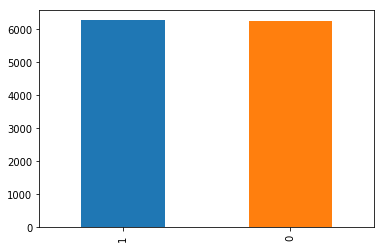

In [73]:
test_cat['label'].value_counts().plot.bar()

In [74]:
test_cat.to_csv('submission.csv', index=False)